In [1]:
import os, glob
import h5py # for loading .h5 files
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams["axes.grid"] = False # don't show grid lines on plots by default
plt.rcParams['figure.figsize'] = (12, 16) # increase size of subplots

In [3]:
import cs230_project_utilities as utils

# Loading the data

In [4]:
# Location of directory H5Exports_AnimiX/ (downloaded from Olivier's link)
dataset_directory = 'H5Exports_AnimiX'

In [5]:
def find_dataset_files(dataset_directory):
    # Find .h5 and .txt files in `dataset_directory`
    # Assuming at most one name.h5 and one name.txt file in `dataset_directory`.
    h5_file_pattern = os.path.join(dataset_directory, '*.h5')
    text_file_pattern = os.path.join(dataset_directory, '*.txt')
    h5_paths = glob.glob(h5_file_pattern)
    text_paths = glob.glob(text_file_pattern)
    print('Found {} .h5 files and {} .txt files.'.format(len(h5_paths), len(text_paths)))
    
    # Merge .h5 and .txt paths into one data structure: a dict where key is filename
    # without extension and value is dict {'h5': h5_path, 'text': text_path}.
    get_filename = lambda path: os.path.splitext(os.path.basename(path))[0]
    files = {}
    for path in h5_paths:
        filename = get_filename(path)
        files[filename] = {'h5': path}
    for path in text_paths:
        filename = get_filename(path)
        files[filename]['text'] = path
      
    return files

In [6]:
# Find all the files in our dataset
files = find_dataset_files(dataset_directory)

Found 133 .h5 files and 133 .txt files.


In [7]:
# Load example files
example = files['1497_18751']
example2 = files['704_7053']
example3 = files['1670_20006']
print(example)
print(example2)
print(example3)

{'text': 'H5Exports_AnimiX/1497_18751.txt', 'h5': 'H5Exports_AnimiX/1497_18751.h5'}
{'text': 'H5Exports_AnimiX/704_7053.txt', 'h5': 'H5Exports_AnimiX/704_7053.h5'}
{'text': 'H5Exports_AnimiX/1670_20006.txt', 'h5': 'H5Exports_AnimiX/1670_20006.h5'}


In [8]:
h5, text = example['h5'], example['text']
print(h5, text)

('H5Exports_AnimiX/1497_18751.h5', 'H5Exports_AnimiX/1497_18751.txt')


In [9]:
# Handle .h5 files

def inspect_h5_file(path):
    with h5py.File(path, 'r') as f:
        # Looks like .h5 files are like dictionaries
        print('Found keys: {}'.format(f.keys()))
        
        # Let's find all the nested keys
        print('\nFinding nested keys...')
        show_keys_for_h5_file(path)
        
        # Unwrap the data stored in the keys
        # known keys: 'clasificacion', 'images', 'kspace/mag', 'kspace/phase'
        print('\nUnwrapping data at known keys...')
        classification = f['clasificacion']
        images = f['images']
        magnitude = f['kspace/mag']
        phase = f['kspace/phase']
        print(classification)
        print(images)
        print(magnitude)
        print(phase)

def show_keys_for_h5_file(path):
    '''
    Convenience function for printing the nested keys in an
    .h5 file.
    '''
    def print_nested_keys(key, value):
        print(key)
        for k, v in value.attrs.iteritems():
            print('{}: {}'.format(key, val))

    with h5py.File(path, 'r') as f:
        f.visititems(print_nested_keys)
        
def read_h5_file(path):
    '''
    Reads a .h5 file from `path`, unwrapping data stored in the known
    keys: 'clasificacion', 'images', 'kspace/mag', 'kspace/phase'.
    '''
    with h5py.File(path, 'r') as f:
        classification = f['clasificacion'].value
        images = f['images'].value
        magnitude = f['kspace/mag'].value
        phase = f['kspace/phase'].value
        
    # Convert to float32 and scale data to [0, 1]
    images = images.astype(np.float32)
    images -= images.min(axis=(1, 2), keepdims=True)
    images /= images.max(axis=(1, 2), keepdims=True)
    print(images.shape)
    
    # Additional conversion scaling here with magnitude data.
    # Most ML and scientific frameworks expect data to be in [0, 1].
    magnitude = magnitude.astype(np.float32)
    magnitude -= magnitude.min(axis=(1, 2), keepdims=True)
    magnitude /= magnitude.max(axis=(1, 2), keepdims=True)
    
    phase = phase.astype(np.float32)
    # Don't scale phase (it represents an angle, so it's always in [0, pi])
    
    return {'classification': classification,
            'images': images,
            'magnitude': magnitude,
            'phase': phase}
    
# Handle .txt files

def inspect_text_file(path):
    with open(path, 'rb') as f:
        print(f.read())


In [10]:
# Let's look at a single .h5 file
inspect_h5_file(h5)

Found keys: [u'clasificacion', u'images', u'kspace']

Finding nested keys...
clasificacion
images
kspace
kspace/mag
kspace/phase

Unwrapping data at known keys...
<HDF5 dataset "clasificacion": shape (15, 1), type "<f8">
<HDF5 dataset "images": shape (15, 256, 256), type "<f8">
<HDF5 dataset "mag": shape (15, 256, 240), type "<f8">
<HDF5 dataset "phase": shape (15, 256, 240), type "<f8">


In [11]:
# We might not need this
inspect_text_file(text) 

filename,PPL,OBSERVE_FREQUENCY,rec_freq,SAMPLE_PERIOD,NO_SAMPLES,NO_VIEWS,VIEWS_PER_SEGMENT,NO_VIEWS_2,oversample,oversample2,oversample3,nav_on,DISCARD,NO_AVERAGES,SLICE_BLOCK,PHASE_CYCLE,subj_angle_x,subj_angle_y,subj_angle_z,SWZ,SLICE_THICKNESS,SLICE_SEPARATION,NO_SLICES,SLICE_INTERLEAVE,SMX,SWX,SMY,SWY,FOV,r_angle_var_1,r_angle_var_2,r_angle_var_3,r_angle_var_4,r_angle_var_5,r_angle_var_6,r_angle_var_7,r_angle_var_8,r_angle_var_9,r_angle_var_10,r_angle_var_11,r_angle_var_12,r_angle_var_13,r_angle_var_14,r_angle_var_15,p_angle_var_1,p_angle_var_2,p_angle_var_3,p_angle_var_4,p_angle_var_5,p_angle_var_6,p_angle_var_7,p_angle_var_8,p_angle_var_9,p_angle_var_10,p_angle_var_11,p_angle_var_12,p_angle_var_13,p_angle_var_14,p_angle_var_15,s_angle_var_1,s_angle_var_2,s_angle_var_3,s_angle_var_4,s_angle_var_5,s_angle_var_6,s_angle_var_7,s_angle_var_8,s_angle_var_9,s_angle_var_10,s_angle_var_11,s_angle_var_12,s_angle_var_13,s_angle_var_14,s_angle_var_15,PHASE_ORIENTATION,FOV_READ_OFF,FOV_PHASE

# Visualizing the data

In [18]:
# Finally, we can see the raw data
h5_data = read_h5_file(h5)
print(h5_data.keys())

images = h5_data['images']
magnitude = h5_data['magnitude']
phase = h5_data['phase']
classification = h5_data['classification']

# (Note: shape of magnitude and phase are different from image)
print(images.shape, magnitude.shape, phase.shape)
print(classification)

(15, 256, 256)
['images', 'phase', 'magnitude', 'classification']
((15, 256, 256), (15, 256, 240), (15, 256, 240))
[[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


PSNR of reconstrution: 331.112505847


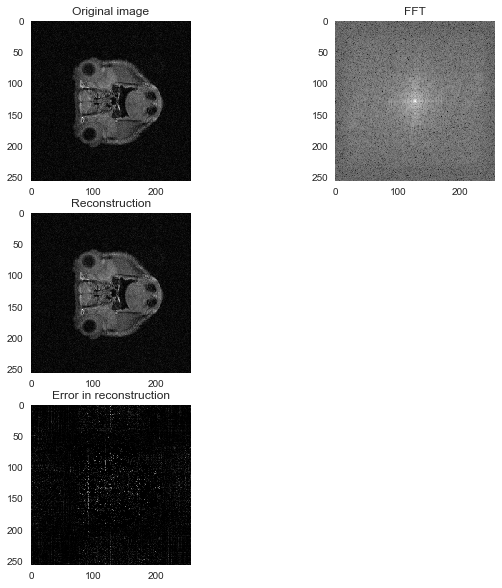

In [19]:
# Function from MRI_reconstruction_example.ipynb
utils.reconstruction_demo.reconstruct_image_from_fully_sampled_fourier_transform(images[0])

PSNR of reconstrution: 34.2621596248
Mask preserves 54.33% of FFT coefficients


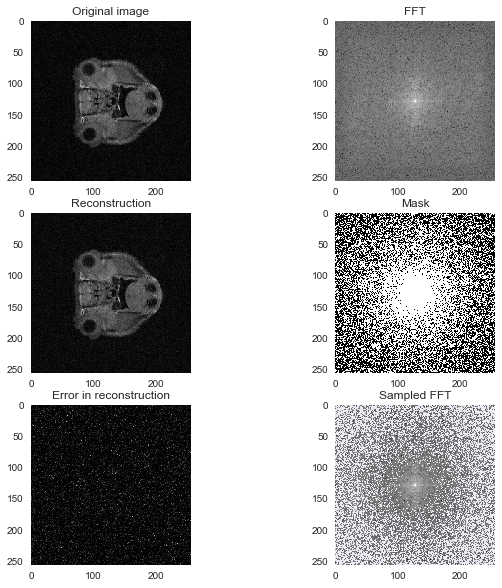

In [20]:
# Load masks for seeing how reconstruction works with sampled k-space data.

def load_mask_and_pdf_data():
    data = np.load('brain.npz')
    # brain_image is complex-valued
    brain_image, uniform_mask, vardens_mask, uniform_pdf, vardens_pdf = (data['im'], data['mask_unif'],
        data['mask_vardens'], data['pdf_unif'], data['pdf_vardens'])
    return brain_image, uniform_mask, vardens_mask, uniform_pdf, vardens_pdf

_, uniform_mask, vardens_mask, uniform_pdf, vardens_pdf = load_mask_and_pdf_data()

# Get center crop of mask because this data has smaller shape
image = images[0]
mask = np.ones_like(image)
mask = vardens_mask[image.shape[0]//2:-image.shape[0]//2, image.shape[0]//2:-image.shape[0]//2]
pdf = vardens_pdf[image.shape[0]//2:-image.shape[0]//2, image.shape[0]//2:-image.shape[0]//2]

# Run reconstruction
utils.reconstruction_demo.reconstruct_image_from_undersampled_fourier_transform(image, mask, pdf)

### Plot magnitude of FFT

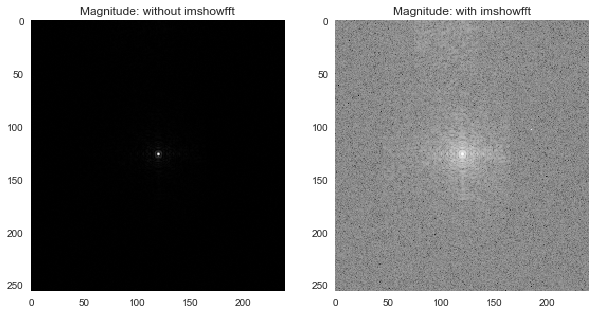

In [21]:
plt.rcParams['figure.figsize'] = (10, 10)

# Should use imshowfft (which takes log of magnitude) here because without it,
# can't visualize the higher frequencies (FFT coefficients are mostly high
# around the center == lower frequencies).

# Plot magnitude
plt.subplot(1, 2, 1)
plt.title('Magnitude: without imshowfft')
utils.plot.imshowgray(magnitude[0])

plt.subplot(1, 2, 2)
plt.title('Magnitude: with imshowfft')
utils.plot.imshowfft(magnitude[0])

### Plot phase of FFT

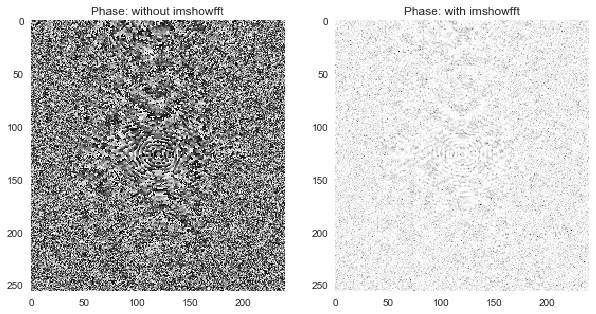

In [22]:
# Plot phase (probably don't want to use imshowfft for phase)
plt.subplot(1, 2, 1)
plt.title('Phase: without imshowfft')
utils.plot.imshowgray(phase[0])

plt.subplot(1, 2, 2)
plt.title('Phase: with imshowfft')
utils.plot.imshowfft(phase[0])

# Reconstruct an image from magnitude and phase

Error in FFT magnitude: 3.13614806093e-20
Error in FFT phase: 6.27353347621e-07


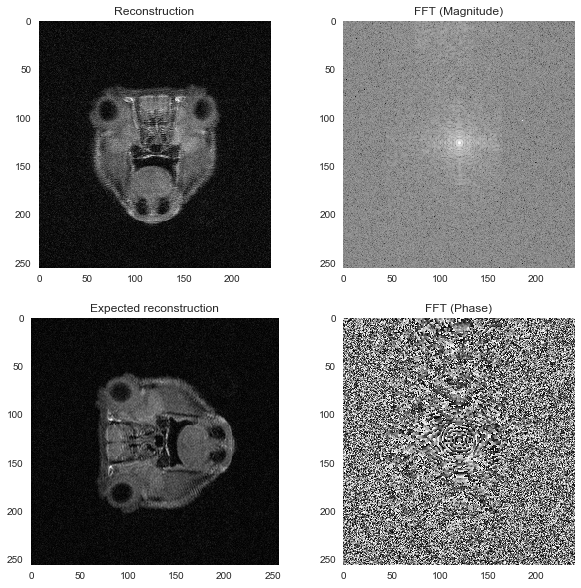

In [23]:
# Construct FFT (k-space data) from magnitude and phase
fft = magnitude[0] * np.exp(1j * phase[0])

# Take the inverse FFT
ifft = utils.signal_processing.ifft_2D_centered(fft)

plt.subplot(2, 2, 1)
plt.title('Reconstruction')
utils.plot.imshowgray(np.abs(ifft))

plt.subplot(2, 2, 2)
plt.title('FFT (Magnitude)')
utils.plot.imshowfft(np.abs(fft))

plt.subplot(2, 2, 3)
plt.title('Expected reconstruction')
utils.plot.imshowgray(images[0])

plt.subplot(2, 2, 4)
plt.title('FFT (Phase)')
utils.plot.imshowgray(np.angle(fft))

# Note: shape of magnitude and phase are different from image.
# Because of this, the reconstruction shape is different from the
# image shape and so we can't compare the image and reconstruction directly.
# How will we solve this?

# This check to make sure we are correctly combining magnitude and phase to construct the full, complex-valued FFT.
print('Error in FFT magnitude: {}'.format(utils.signal_processing.mean_square_error(np.abs(fft), magnitude[0])))
print('Error in FFT phase: {}'.format(utils.signal_processing.mean_square_error(np.angle(fft), phase[0])))
